# Predicting prices of houses in tehran

### Step 1: Importing required libraries

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Importing Data

In [13]:
df = pd.read_csv (r'C:/Users/farha/Desktop/Houses_datas.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Address_Type,Price_Dollar
0,63,1,True,True,True,Shahran,1,61666.67
1,60,1,True,True,True,Shahran,1,61666.67
2,79,2,True,True,True,Pardis,2,18333.33
3,95,2,True,True,True,Shahrake Qods,3,30083.33
4,123,2,True,True,True,Shahrake Gharb,4,233333.33


### Step 3: Dividing Data to Train and Test

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### Step 4 : Looking at the Data 

In [6]:
df.describe()

,Area,Room,Address_Type,Price_Dollar
count,3303.000000,3303.000000,3303.000000,3.303000e+03
mean,108.217984,2.097184,84.857402,1.825851e+05
std,70.599872,0.764483,153.931760,2.759305e+05
min,30.000000,0.000000,1.000000,1.200000e+02
25%,70.000000,2.000000,19.000000,4.500000e+04
50%,90.000000,2.000000,37.000000,9.833333e+04
75%,123.000000,2.500000,73.000000,2.078333e+05
max,929.000000,5.000000,1500.000000,3.080000e+06


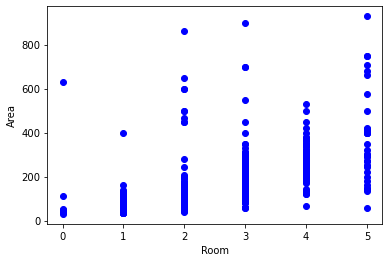

In [34]:
plt.scatter(df.Room, df.Area,  color='blue')
plt.xlabel('Room')
plt.ylabel('Area')
plt.show()

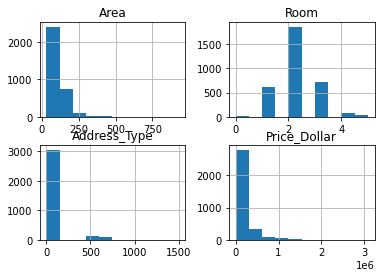

In [35]:
viz = df[['Area','Room','Address_Type','Price_Dollar']]
viz.hist()
plt.show()

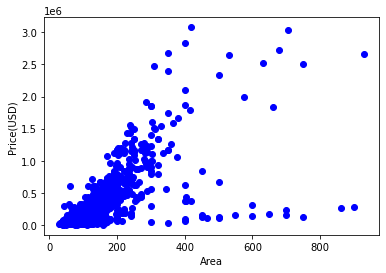

In [36]:
plt.scatter(df.Area, df.Price_Dollar,  color='blue')
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.show()

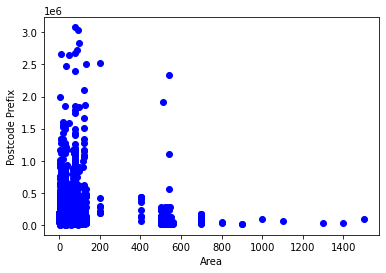

In [37]:
plt.scatter(df.Address_Type, df.Price_Dollar,  color='blue')
plt.xlabel('Area')
plt.ylabel('Postcode Prefix')
plt.show()

### Step 5: Creating and implementing the Model

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','Address_Type']])
y = np.asanyarray(train[['Price_Dollar']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 2.28647545e+03  5.49816892e+04 -1.29410957e+04  3.69517998e+04
   4.36481954e+04 -1.46087864e+01]]


### Step 6: Testing the Model

In [19]:
y_hat= regr.predict(test[['Area','Room','Parking','Warehouse','Elevator','Address_Type']])
x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','Address_Type']])
y = np.asanyarray(test[['Price_Dollar']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 31083452316.40
Variance score: 0.61
